In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sqlalchemy import create_engine

driver = 'mysql+pymysql:'
user = 'root'
password = ''
ip = '35.198.146.55'
database = 'exoplanets'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [6]:
# Importing data from SQL
kepler = pd.read_sql_query(
'''SELECT * FROM kepler
''', engine)

kepler.drop('index', axis=1, inplace=True)

In [7]:
kepler.head()

,disposition,pdisposition,orb_period,impact,duration,depth,prad,teq,insol,steff,slogg,srad,right_ascension,declination
0,CONFIRMED,CANDIDATE,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,291.93423,48.141651
1,CONFIRMED,CANDIDATE,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,291.93423,48.141651
2,FALSE POSITIVE,FALSE POSITIVE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,297.00482,48.134129
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,285.53461,48.285210
4,CONFIRMED,CANDIDATE,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,288.75488,48.226200


In [8]:
kepler.shape

(9564, 14)

# Disposition of detections

We have two columns of disposition for the KOIs (Kepler Objects of Interest):
* pdisposition: preliminary status of the KOI, CANDIDATE or a FALSE POSITIVE
* disposition: status of the KOI, FALSE POSITIVE, CANDIDATE or CONFIRMED exoplanet

In [9]:
kepler.groupby(by='pdisposition').count()

,disposition,orb_period,impact,duration,depth,prad,teq,insol,steff,slogg,srad,right_ascension,declination
pdisposition,,,,,,,,,,,,,
CANDIDATE,4496,4496,4433,4496,4433,4433,4433,4434,4433,4433,4433,4496,4496
FALSE POSITIVE,5068,5068,4768,5068,4768,4768,4768,4809,4768,4768,4768,5068,5068


In [10]:
kepler.groupby(by='disposition').count()

,pdisposition,orb_period,impact,duration,depth,prad,teq,insol,steff,slogg,srad,right_ascension,declination
disposition,,,,,,,,,,,,,
CANDIDATE,2248,2248,2185,2248,2185,2185,2185,2186,2185,2185,2185,2248,2248
CONFIRMED,2293,2293,2292,2293,2292,2292,2292,2292,2292,2292,2292,2293,2293
FALSE POSITIVE,5023,5023,4724,5023,4724,4724,4724,4765,4724,4724,4724,5023,5023


### Plotting dispositions

Text(0.5, 0, 'Disposition of the object')

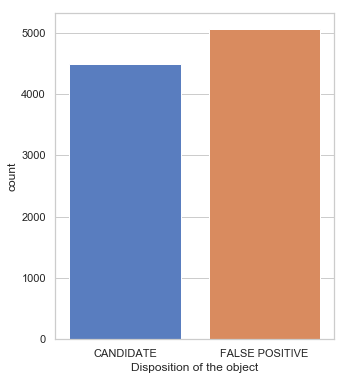

In [11]:
# Preliminary disposition
plt.figure(figsize=(5,6))
sns.set(style="whitegrid")
ax = sns.countplot(x="pdisposition", palette="muted",  data=kepler)
plt.xlabel('Disposition of the object')

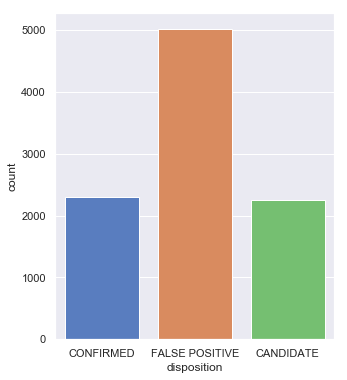

In [12]:
# Final disposition
plt.figure(figsize=(5,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="disposition", palette="muted",  data=kepler)

In [13]:
# Calculating percentages to see the information clearly

total = 9564
p_candidates = 4496
p_false = 5068
candidate = 2248
confirmed = 2293
false = 5023

print('\n')
print('From the preliminary tests:')
tot_false = round((p_false/total)*100, 2)
print(tot_false, '% of KOIs are FALSE POSITIVES')

candidates = round((4496/total)*100, 2)
print(candidates, '% of KOIs are CANDIDATES')
print('\n')

print('Final results:')
tot_confirmed = round((confirmed/total)*100, 2)
tot_candidate = round((candidate/total)*100, 2)
tot_false = round((false/total)*100, 2)

print(tot_false, '% of KOIs are FALSE POSITIVES')
print(tot_candidate, ' % of KOIs are CANDIDATES')
print(tot_confirmed, '% of KOIs end up being CONFIRMED exoplanets')



From the preliminary tests:
52.99 % of KOIs are FALSE POSITIVES
47.01 % of KOIs are CANDIDATES


Final results:
52.52 % of KOIs are FALSE POSITIVES
23.5  % of KOIs are CANDIDATES
23.98 % of KOIs end up being CONFIRMED exoplanets


In [14]:
# Transitions of the KOIs status (how many times each possible combination occurred)
(kepler.pdisposition + ' - ' + kepler.disposition).value_counts()

FALSE POSITIVE - FALSE POSITIVE    5023
CANDIDATE - CONFIRMED              2248
CANDIDATE - CANDIDATE              2248
FALSE POSITIVE - CONFIRMED           45
dtype: int64

### Plotting celestial coordinates

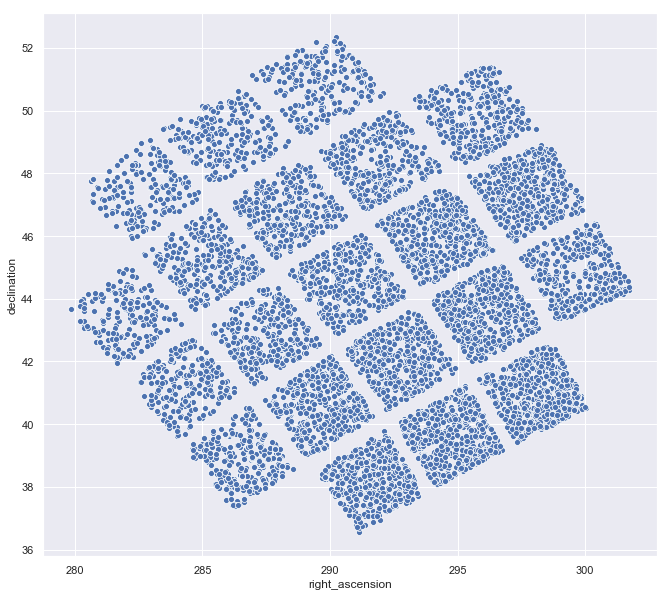

In [15]:
# Plotting coordinates of all CONFIRMED KOIs to map the part of the sky that Kepler went through.

plt.figure(figsize=(11,10))
sns.scatterplot(x='right_ascension', y='declination', data=kepler)